In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
plt.style.use('seaborn')

In [3]:
dfx = pd.read_csv("./xdata.csv")
dfy = pd.read_csv("./ydata.csv")

In [4]:
x = dfx.values
y = dfy.values

In [5]:
x = x[:,1:]

In [6]:
y = y[:,1:]

In [7]:
y = y.reshape((-1,))
print(x)

[[ 3.516279    3.71975047]
 [ 4.60649561  3.41437943]
 [ 4.67701056  3.04724443]
 [ 4.15772454  3.13867678]
 [ 3.15443087  3.61985805]
 [ 3.41751854  4.59164128]
 [ 1.61124605  3.39835595]
 [ 4.28808719  4.04396943]
 [ 3.19607968  4.95114323]
 [ 1.6258394   4.90239967]
 [ 2.82894521  3.91445026]
 [ 2.28966729  5.06896877]
 [ 2.89206152  3.66529487]
 [ 2.33634919  4.77256166]
 [ 3.67027475  3.79730296]
 [ 2.30717865  4.73262822]
 [ 3.15130599  3.43648588]
 [ 4.14502484  2.94851846]
 [ 2.17253471  3.6488889 ]
 [ 3.39390371  4.13447274]
 [ 1.59644351  4.43875703]
 [ 3.38348549  4.02119623]
 [ 5.08330979  4.03477733]
 [ 1.21644435  4.31174386]
 [ 4.15939179  2.54939222]
 [ 2.2392529   4.33673035]
 [ 2.99918423  5.63946256]
 [ 3.10384641  3.0156258 ]
 [ 2.47612428  4.12508079]
 [ 3.2447355   2.49239435]
 [ 2.03739207  5.03815425]
 [ 0.60211258  5.29511732]
 [ 4.96947578  3.37368252]
 [ 3.21264629  3.83263367]
 [ 4.37032895  4.13833792]
 [ 3.69323485  3.24528272]
 [ 3.09839038  3.35192483]
 

In [8]:
print(y)
print(x.shape)
print(y.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

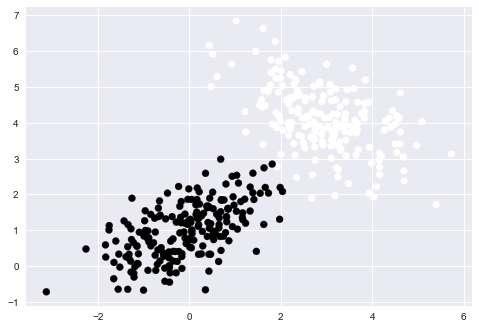

In [9]:
plt.scatter(x[:,0],x[:,1] , c = y)

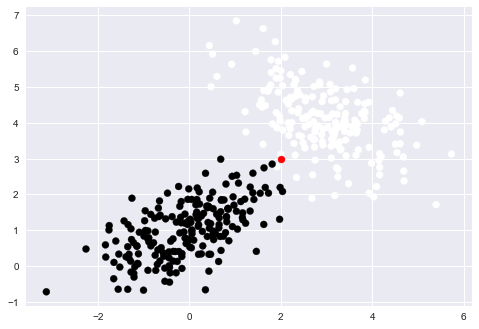

In [10]:
query_x = np.array([2,3])
plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter(query_x[0],query_x[1],color='red')
plt.show()

In [11]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [12]:
def Knn(x,y,queryPoint,k = 5):
    m = x.shape[0]
    vals = []
    
    for i in range(m):
        d = dist(queryPoint,x[i])
        vals.append((d,y[i]))
    
    vals = sorted(vals)
    vals = vals[:k]
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1] , return_counts = True)
    print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [13]:
p = Knn(x,y,query_x)

(array([0., 1.]), array([3, 2], dtype=int64))


In [14]:
p

0.0

# Diabetes solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
plt.style.use('seaborn')
dfx = pd.read_csv('Diabetes_XTrain.csv')
dfy = pd.read_csv('Diabetes_YTrain.csv')
X = dfx.values
Y = dfy.values
#print(Y)
X = X[:,0:]
Y = Y[:].reshape((-1,))
print(X.shape)
print(Y.shape)
print(X[:,0])

(576, 8)
(576,)
[ 7.  8.  7.  2.  4.  7.  4.  1.  3.  1.  2. 10.  3.  6.  0.  6.  7.  1.
  4.  0.  0.  1.  5.  1.  3.  5.  2.  0.  4.  9.  2.  4.  1.  2.  2.  0.
  3.  9.  2.  5.  7.  3. 11.  2.  7.  5.  0. 10.  3.  0.  0.  3. 13.  1.
  9.  3.  1.  8.  4.  4.  4.  6.  1.  1.  8.  9.  3.  5.  2.  0.  1.  3.
  0.  0.  8.  4.  1.  2. 13. 10.  1.  0.  0.  1.  2.  3.  4.  0.  0.  1.
 12.  6.  1.  5.  1.  2. 10.  6.  0.  4.  8.  5.  2.  4.  0.  1.  7.  3.
  1.  1.  8.  2.  8.  1.  3.  4.  4.  1. 10.  1.  3.  5.  2.  6.  3. 17.
  8.  1.  2.  4.  4.  5.  1.  2.  0.  3.  0. 13.  4.  1.  2.  0.  6.  1.
  2.  7.  6.  8. 13. 10.  4.  3.  6.  2.  7.  0.  4.  9.  5.  5.  8.  0.
  6.  0.  4. 14.  0.  5.  2.  7.  4. 13.  0.  1.  3.  1.  2.  0.  2.  2.
  4.  1.  1.  4.  8.  3.  8.  4.  0.  6. 10.  0.  0.  1.  1.  6.  4.  9.
  1.  5.  1.  3. 13.  8.  3.  5.  1.  1.  3.  2.  1.  2.  0.  5.  1.  3.
  1.  0.  5.  6.  4.  1.  1.  1.  7.  2.  5.  0.  6.  9.  4.  0. 10.  0.
  3.  2.  1.  4.  2.  4.  3.  4.  4

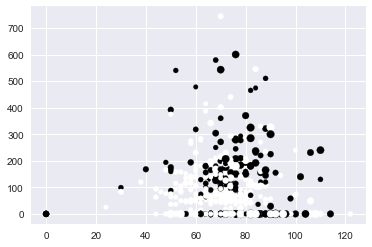

In [2]:
plt.scatter(X[:,2],X[:,4],X[:,7], c=Y)
plt.show()

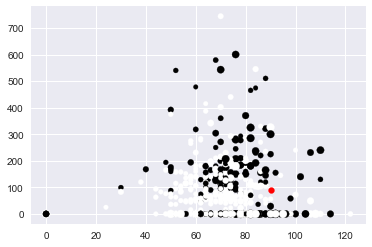

In [3]:
query_x = np.array([90,90,35])
plt.scatter(X[:,2],X[:,4],X[:,7],c=Y)
plt.scatter(query_x[0],query_x[1],query_x[2],color='red')
plt.show()

In [5]:
from math import sqrt
def dist(x1,x2):
    sum1=0
    for i in range(2):
        sum1=sum1 + (x1[i]-x2[i])**2
    return sqrt(sum1)
# Test Time 
def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))       
    
    vals = sorted(vals)
    
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals,vals[:,1])
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred
x = knn(X,Y,[88,321,40])
x

1.0

In [6]:
train = pd.read_csv('Diabetes_Xtest.csv')
train=train.values
train1 = train[:,2]
train2 = train[:,4]
train3 = train[:,7]
l=192
out=[]
for i in range(l):
    l1=[train1[i],train2[i],train3[i]]
    x= int(knn(X,Y,l1))
    out.append(x)
out

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [7]:
import csv
row_list=out
with open('output.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for i in row_list:
        writer.writerow(str(i))

# Diabetes

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [9]:
dfx=pd.read_csv('Diabetes_XTrain.csv')

In [10]:
dfy=pd.read_csv('Diabetes_YTrain.csv')

In [11]:
print(dfx.shape)

(576, 8)


In [21]:
#Lets convert dataset into numpy array first
X=dfx.values
Y=dfy.values

In [22]:
print(X)

[[  7.    168.     88.    ...  38.2     0.787  40.   ]
 [  8.    110.     76.    ...  27.8     0.237  58.   ]
 [  7.    147.     76.    ...  39.4     0.257  43.   ]
 ...
 [  2.    122.     60.    ...  29.8     0.717  22.   ]
 [  4.    154.     72.    ...  31.3     0.338  37.   ]
 [  1.     88.     78.    ...  32.      0.365  29.   ]]


In [23]:
print(Y)

[[1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]


In [24]:
X = X[:,0:]

In [25]:
print(x)

[[168.     88.     42.    ...  38.2     0.787  40.   ]
 [110.     76.      0.    ...  27.8     0.237  58.   ]
 [147.     76.      0.    ...  39.4     0.257  43.   ]
 ...
 [122.     60.     18.    ...  29.8     0.717  22.   ]
 [154.     72.     29.    ...  31.3     0.338  37.   ]
 [ 88.     78.     29.    ...  32.      0.365  29.   ]]


In [26]:
Y = Y[:].reshape((-1,))

In [27]:
print(X.shape)
print(Y.shape)
print(X[:,0])

(576, 8)
(576,)
[ 7.  8.  7.  2.  4.  7.  4.  1.  3.  1.  2. 10.  3.  6.  0.  6.  7.  1.
  4.  0.  0.  1.  5.  1.  3.  5.  2.  0.  4.  9.  2.  4.  1.  2.  2.  0.
  3.  9.  2.  5.  7.  3. 11.  2.  7.  5.  0. 10.  3.  0.  0.  3. 13.  1.
  9.  3.  1.  8.  4.  4.  4.  6.  1.  1.  8.  9.  3.  5.  2.  0.  1.  3.
  0.  0.  8.  4.  1.  2. 13. 10.  1.  0.  0.  1.  2.  3.  4.  0.  0.  1.
 12.  6.  1.  5.  1.  2. 10.  6.  0.  4.  8.  5.  2.  4.  0.  1.  7.  3.
  1.  1.  8.  2.  8.  1.  3.  4.  4.  1. 10.  1.  3.  5.  2.  6.  3. 17.
  8.  1.  2.  4.  4.  5.  1.  2.  0.  3.  0. 13.  4.  1.  2.  0.  6.  1.
  2.  7.  6.  8. 13. 10.  4.  3.  6.  2.  7.  0.  4.  9.  5.  5.  8.  0.
  6.  0.  4. 14.  0.  5.  2.  7.  4. 13.  0.  1.  3.  1.  2.  0.  2.  2.
  4.  1.  1.  4.  8.  3.  8.  4.  0.  6. 10.  0.  0.  1.  1.  6.  4.  9.
  1.  5.  1.  3. 13.  8.  3.  5.  1.  1.  3.  2.  1.  2.  0.  5.  1.  3.
  1.  0.  5.  6.  4.  1.  1.  1.  7.  2.  5.  0.  6.  9.  4.  0. 10.  0.
  3.  2.  1.  4.  2.  4.  3.  4.  4

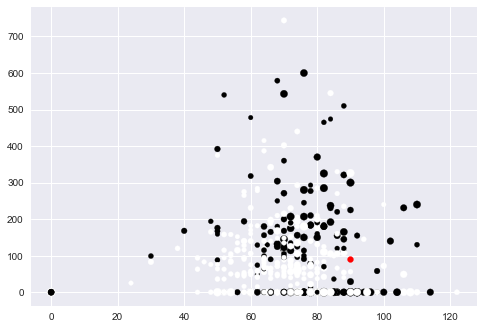

In [29]:

query_x = np.array([90,90,35,)
plt.scatter(X[:,2],X[:,4],X[:,7],c=Y)
plt.scatter(query_x[0],query_x[1],query_x[2],color='red')
plt.show()

In [33]:

from math import sqrt
def dist(x1,x2):
    sum1=0
    for i in range(2):
        sum1=sum1 + (x1[i]-x2[i])**2
    return sqrt(sum1)
# Test Time 
def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))       
    
    vals = sorted(vals)
    
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals,vals[:,1])
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred
x = knn(X,Y,[88,321,40])
x

1.0

In [34]:
train = pd.read_csv('Diabetes_Xtest.csv')
train=train.values
train1 = train[:,2]
train2 = train[:,4]
train3 = train[:,7]
l=192
out=[]
for i in range(l):
    l1=[train1[i],train2[i],train3[i]]
    x= int(knn(X,Y,l1))
    out.append(x)
out

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]